In [5]:
import numpy as np
import pandas as pd

In [23]:
data = pd.read_csv('/content/train_loan_preprocess.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

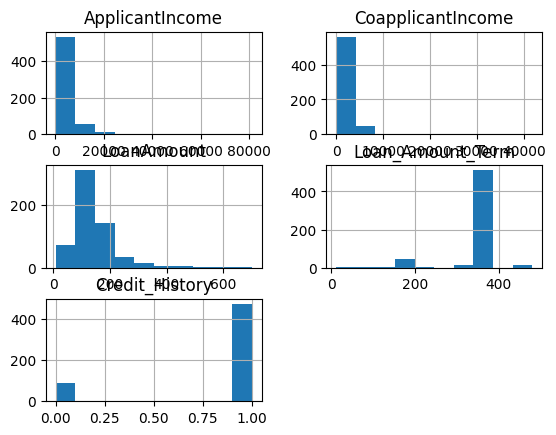

In [10]:
data.hist()

MISSING VALUES HANDLING

In [50]:
columns_to_fill = ['ApplicantIncome'	,'CoapplicantIncome','Loan_Amount_Term']
for col in columns_to_fill:
  data[col].fillna(data[col].mean(), inplace =True)


In [57]:
columns_to_fill = ['LoanAmount']
for col in columns_to_fill:
  data[col].fillna(data[col].median(), inplace =True)

In [38]:
columns_to_fill = ['Credit_History']
for col in columns_to_fill:
  data[col].fillna(data[col].mean(), inplace =True)

In [39]:
data['Gender'].fillna('Male', inplace=True)
data['Married'].fillna('No',inplace=True)
data['Dependents'].fillna('1',inplace=True)
data['Self_Employed'].fillna('No',inplace=True)

In [40]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

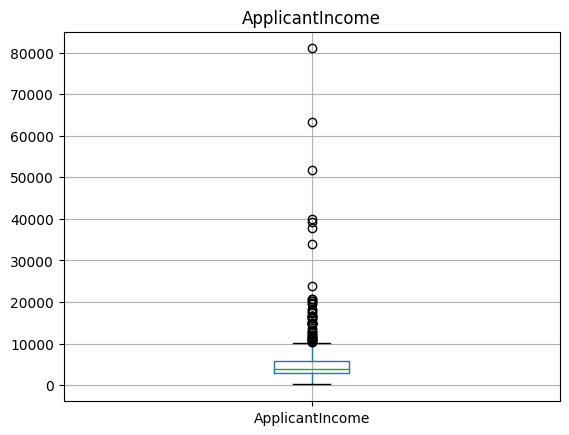

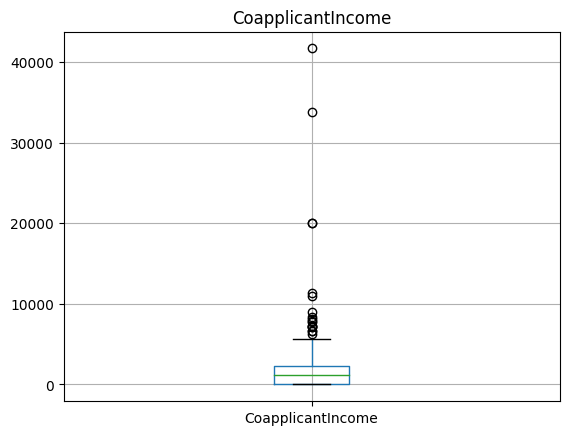

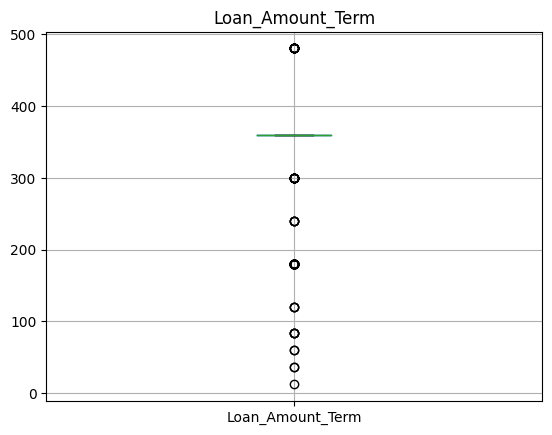

In [51]:
for col in columns_to_fill:
    plt.figure()
    data.boxplot(column=col)
    plt.title(col)
    plt.show()

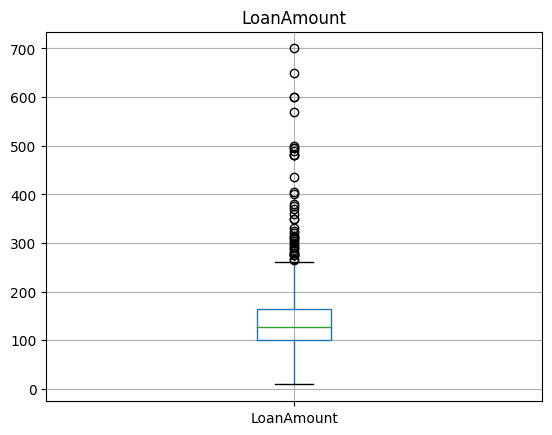

In [58]:
for col in columns_to_fill:
    plt.figure()
    data.boxplot(column=col)
    plt.title(col)
    plt.show()

OUTLIERS

In [61]:
Q1 = np.percentile(data['ApplicantIncome'],25 ,interpolation = 'midpoint')
Q2= np.percentile(data['ApplicantIncome'],50 ,interpolation = 'midpoint')
Q3 = np.percentile(data['ApplicantIncome'],75, interpolation = 'midpoint')

In [62]:
print(Q1,Q2,Q3)

2879.0 3812.5 5790.0


In [54]:
IQR = Q3-Q1
IQR

2911.0

In [55]:
min_val =   Q1 - 1.5*IQR
max_val =   Q3+1.5*IQR
print(min_val,max_val)

-1487.5 10156.5


In [56]:
outliers =[]
for x in data['ApplicantIncome']:
  if ((x>max_val)or (x<min_val)):
    outliers.append(x)
outliers

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

In [88]:
data['ApplicantIncome'] = data['ApplicantIncome'].clip(min_val,max_val)

In [69]:
Q1 = np.percentile(data['LoanAmount'],25 ,interpolation = 'midpoint')
Q2= np.percentile(data['LoanAmount'],50 ,interpolation = 'midpoint')
Q3 = np.percentile(data['LoanAmount'],75, interpolation = 'midpoint')

In [70]:
print(Q1,Q2,Q3)


100.5 128.0 164.5


In [71]:
IQR = Q3-Q1
IQR

64.0

In [72]:
min_val =   Q1 - 1.5*IQR
max_val =   Q3+1.5*IQR
print(min_val,max_val)

4.5 260.5


In [74]:
outliers =[]
for x in data['LoanAmount']:
  if ((x>max_val)or (x<min_val)):
    outliers.append(x)
outliers

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [87]:
data['LoanAmount'] = data['LoanAmount'].clip(min_val,max_val)

In [80]:
Q1 = np.percentile(data['CoapplicantIncome'],25 ,interpolation = 'midpoint')
Q2= np.percentile(data['CoapplicantIncome'],50 ,interpolation = 'midpoint')
Q3 = np.percentile(data['CoapplicantIncome'],75, interpolation = 'midpoint')

In [81]:
print(Q1,Q2,Q3)

0.0 1188.5 2292.5


In [82]:
IQR = Q3-Q1
IQR

2292.5

In [83]:
min_val =   Q1 - 1.5*IQR
max_val =   Q3+1.5*IQR
print(min_val,max_val)

-3438.75 5731.25


In [84]:
outliers =[]
for x in data['CoapplicantIncome']:
  if ((x>max_val)or (x<min_val)):
    outliers.append(x)
outliers

[10968.0,
 8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6667.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

In [86]:
data['CoapplicantIncome'] = data['CoapplicantIncome'].clip(min_val,max_val)

ENCODING

In [41]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler

In [42]:
label_enc   = LabelEncoder()

In [16]:
data['Property_Area_encoded'] = label_enc.fit_transform(data['Property_Area'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,2
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2


STD scaling

In [19]:
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,-0.211241,360.0,1.0,Urban,Y,2
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.211241,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.948996,360.0,1.0,Urban,Y,2
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.306435,360.0,1.0,Urban,Y,2
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.554487,-0.056551,360.0,1.0,Urban,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,-0.410130,-0.554487,-0.889500,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,-0.212557,-0.554487,-1.258378,180.0,1.0,Rural,Y,0
611,LP002983,Male,Yes,1,Graduate,No,0.437174,-0.472404,1.276168,360.0,1.0,Urban,Y,2
612,LP002984,Male,Yes,2,Graduate,No,0.357064,-0.554487,0.490816,360.0,1.0,Urban,Y,2


MINMAX SCALING

In [20]:

scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y,2
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y,2
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y,2
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y,0
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y,2
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y,2
